In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap

# Creating two collections of points
- N evenly spaced points around the north pole at 80 deg. latitude 
- A straight line from Nijmegen (NL) to Berlin (DE)

(in lat/lon coordinates)

In [2]:
N = 50

longs = np.linspace(-180,180,num=N,endpoint=False)
lats = np.ones(N)*80.0

y = lats
x = longs


polarCircle = pd.DataFrame({"x":x, "y":y})

In [3]:
N = 50

cityA = np.array([5.84280, 51.8449])
cityB = np.array([13.4050, 52.5200])

t = np.linspace(0,1,num=N)[:,np.newaxis]

path = (1-t)*cityA + t*cityB

someLine = pd.DataFrame(path,columns=["x","y"])

# Two plotting methods
Both methods create a `Basemap` using the `srid` defined by the dataset.
`plotA` plots raw point coordinates, `plotB` converts them first using the `Basemap`.

In [35]:
def plotA(points, srid, ax, bounds):
    x1, x2, y1, y2 = bounds
    databmap = Basemap(epsg=srid, ax=ax, llcrnrlat=y1, urcrnrlat=y2, llcrnrlon=x1, urcrnrlon=x2)
    databmap.drawcountries()
    databmap.drawcoastlines()
    # --------------
    # Key difference:
    x,y = points["x"].values, points["y"].values
    # --------------
    bus_collection = ax.scatter(x,y, c='b', edgecolor='face')


def plotB(points, srid, ax, bounds):
    x1, x2, y1, y2 = bounds
    databmap = Basemap(epsg=srid, ax=ax, llcrnrlat=y1, urcrnrlat=y2, llcrnrlon=x1, urcrnrlon=x2)
    databmap.drawcountries()
    databmap.drawcoastlines()
    # --------------
    # Key difference:
    x,y = databmap(points["x"].values, points["y"].values, inverse=False)
    print(x,y)
    # --------------
    bus_collection = ax.scatter(x,y, c='b', edgecolor='face')

# Lat/lon dataset

Text(0.5, 1.0, 'plotB')

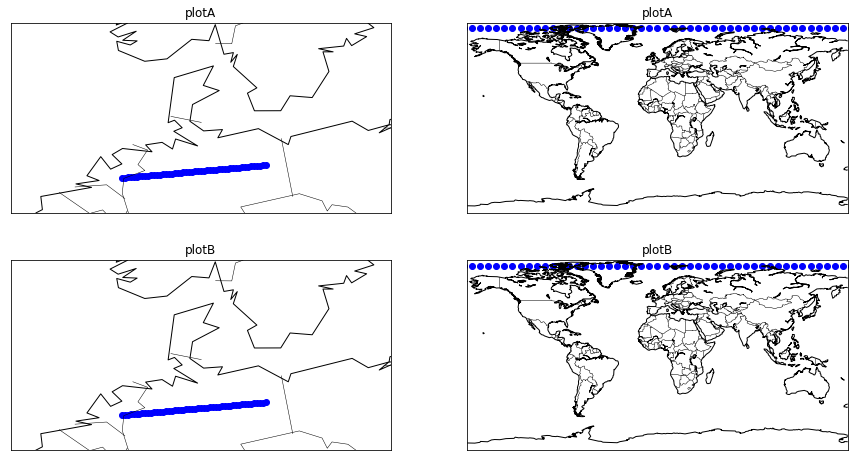

In [13]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(15,8)


geBounds = [0,20,50,60]
wwBounds = [-170,170,-85,85]


plotA(someLine, None, axes[0,0], geBounds)
plotA(polarCircle, None, axes[0,1], wwBounds)
plotB(someLine, None, axes[1,0], geBounds)
plotB(polarCircle, None, axes[1,1], wwBounds)


axes[0,0].set_title("plotA")
axes[0,1].set_title("plotA")
axes[1,0].set_title("plotB")
axes[1,1].set_title("plotB")

Both plotting methods produce the same result (since the dataset is in lat/lon coordinates)

# Transformed dataset

In [36]:
# The mercator projection: http://spatialreference.org/ref/epsg/wgs-84-world-mercator/
mercSRID = "3395"

conversionbmap = Basemap(epsg=mercSRID)

def convert(df,bmap):
    x,y = bmap(df["x"].values,df["y"].values)
    return pd.DataFrame({"x":x,"y":y})

someLineMerc = convert(someLine, conversionbmap)
polarCircleMerc = convert(polarCircle, conversionbmap)

print(conversionbmap(someLineMerc["x"].values,someLineMerc["y"].values, inverse=True))
print(someLineMerc["x"].values,someLineMerc["y"].values)
print(someLine["x"].values,someLine["y"].values)


geBounds = [0,20,50,60]
plotB(someLine, mercSRID, axes[1,0], geBounds)

(array([ 5.8428    ,  5.99713061,  6.15146122,  6.30579184,  6.46012245,
        6.61445306,  6.76878367,  6.92311429,  7.0774449 ,  7.23177551,
        7.38610612,  7.54043673,  7.69476735,  7.84909796,  8.00342857,
        8.15775918,  8.3120898 ,  8.46642041,  8.62075102,  8.77508163,
        8.92941224,  9.08374286,  9.23807347,  9.39240408,  9.54673469,
        9.70106531,  9.85539592, 10.00972653, 10.16405714, 10.31838776,
       10.47271837, 10.62704898, 10.78137959, 10.9357102 , 11.09004082,
       11.24437143, 11.39870204, 11.55303265, 11.70736327, 11.86169388,
       12.01602449, 12.1703551 , 12.32468571, 12.47901633, 12.63334694,
       12.78767755, 12.94200816, 13.09633878, 13.25066939, 13.405     ]), array([51.8449    , 51.85867755, 51.8724551 , 51.88623265, 51.9000102 ,
       51.91378776, 51.92756531, 51.94134286, 51.95512041, 51.96889796,
       51.98267551, 51.99645306, 52.01023061, 52.02400816, 52.03778571,
       52.05156327, 52.06534082, 52.07911837, 52.09289592, 52

Text(0.5, 1.0, 'plotB')

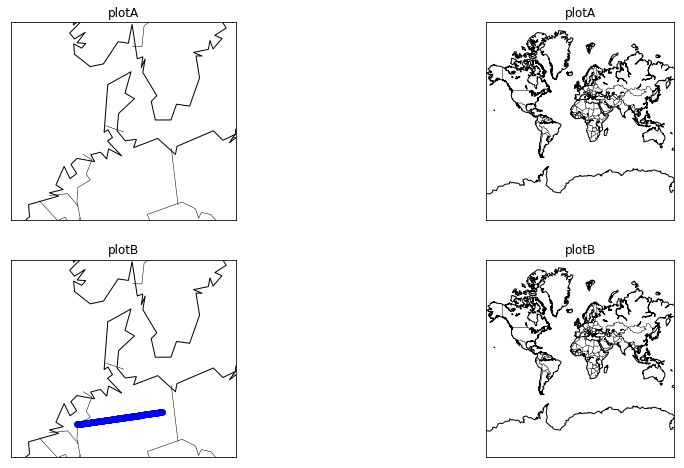

In [33]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(15,8)


geBounds = [0,20,50,60]
wwBounds = [-170,170,-85,85]



plotA(someLineMerc, mercSRID, axes[0,0], geBounds)
plotA(polarCircleMerc, mercSRID, axes[0,1], wwBounds)
plotB(someLine, mercSRID, axes[1,0], geBounds)
plotB(polarCircleMerc, mercSRID, axes[1,1], wwBounds)



axes[0,0].set_title("plotA")
axes[0,1].set_title("plotA")
axes[1,0].set_title("plotB")
axes[1,1].set_title("plotB")

In [64]:
x1, x2, y1, y2 = [0,20,50,60]

bmapA = Basemap(projection="merc")
bmapB = Basemap(projection="merc", llcrnrlat=-89.99, urcrnrlat=89.99, llcrnrlon=-180, urcrnrlon=180)
bmapC = Basemap(projection="merc", llcrnrlat=y1, urcrnrlat=y2, llcrnrlon=x1, urcrnrlon=x2)


# Transform the coordinate (lon: 12, lat: 52):
print(bmapA([12],[52]))
print(bmapB([12],[52]))
print(bmapC([12],[52]))

([21349415.862658788], [66339318.940530896])
([21349415.862658788], [66339318.940530896])
([1334338.4914161742], [353453.49673362076])


In [46]:
bmapA

AttributeError: 'Basemap' object has no attribute 'epsg'